In [13]:
import pymongo


client = pymongo.MongoClient()

# print(client.list_database_names())
db = client['PAM2060']
# print(db.list_collection_names())
col = db['vision_retries']


In [12]:
for s in range(101,111):
    res = col.find({'station':s, 'component': 'holder'})
    res = [r['steps'] for r in res]
    res2 = [len(r) for r in res]
    av = sum(res2) / len(res2)

    print(s, av, res)

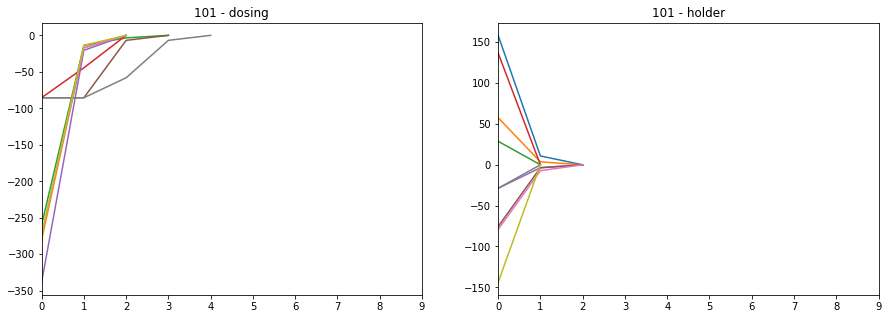

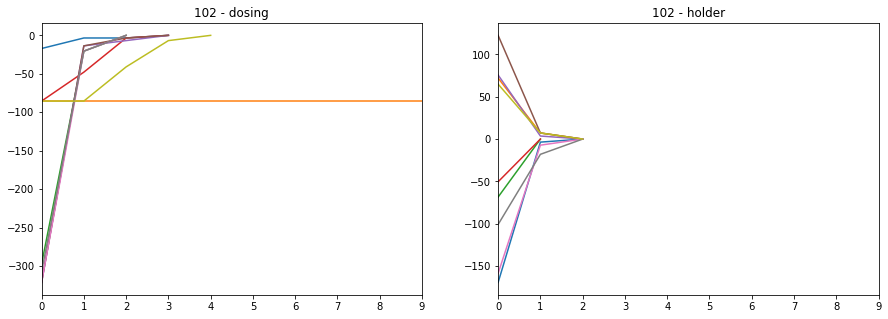

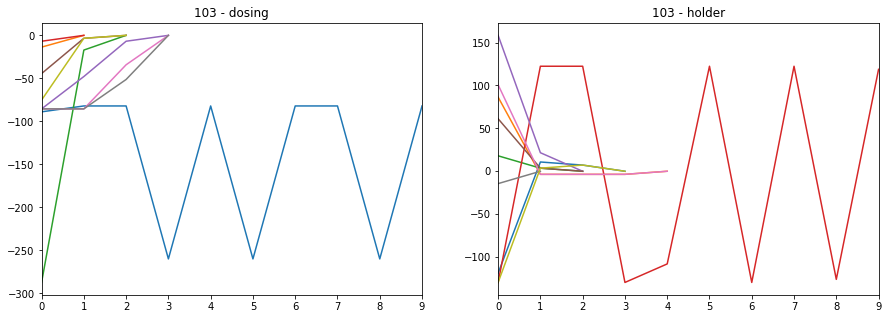

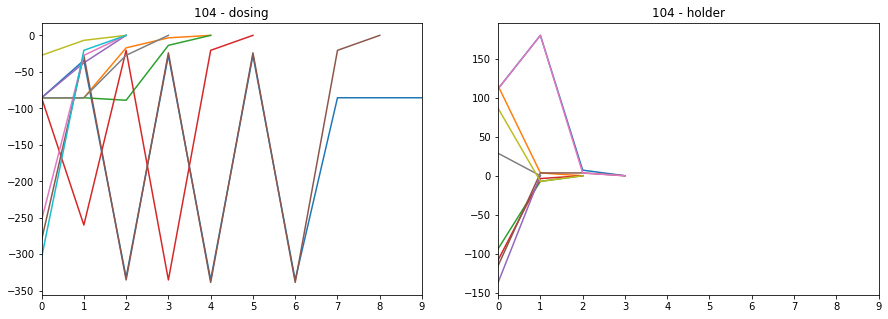

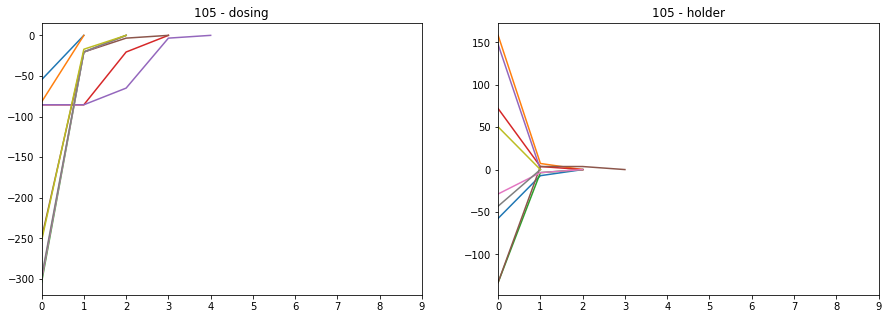

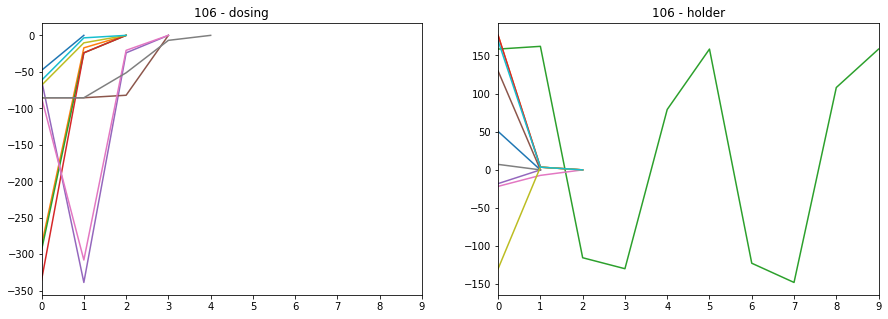

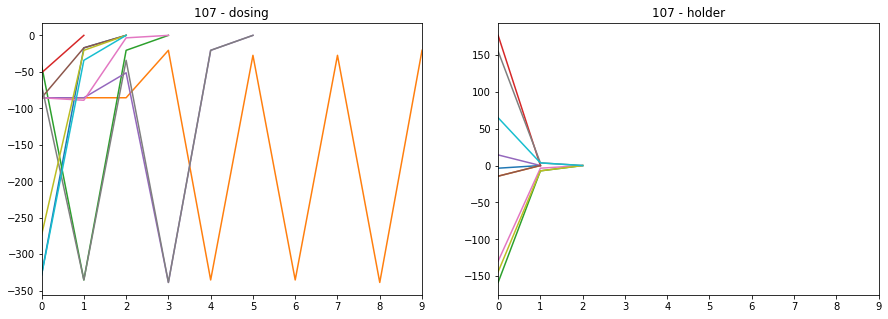

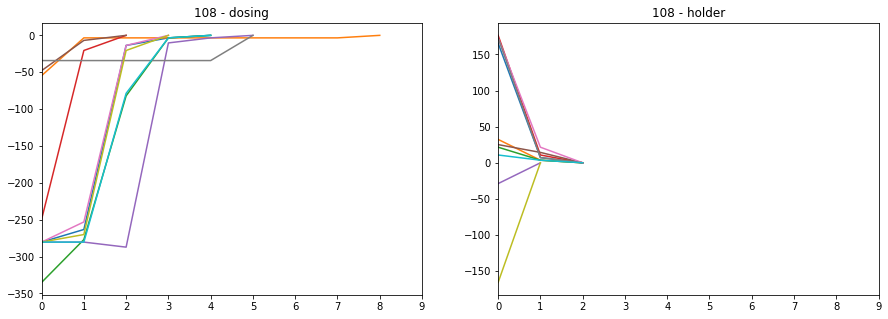

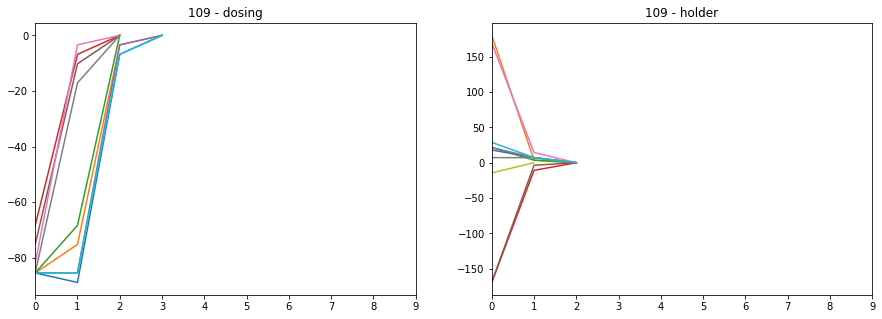

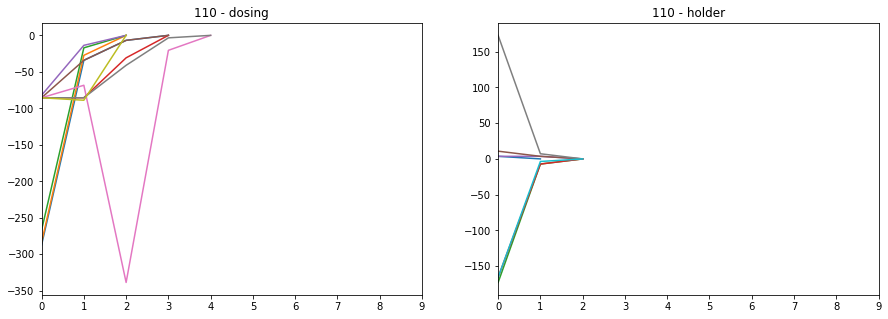

In [37]:
import matplotlib.pyplot as plt
import datetime
from bson.objectid import ObjectId

mins = 15
now = datetime.datetime.now() - datetime.timedelta(hours=3.5)
from_time = now - datetime.timedelta(hours=1)
dummy_id = ObjectId.from_datetime(from_time)


for s in range(101,111):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    axs = {'dosing': ax1, 'holder': ax2}
    fig.set_size_inches(15, 5, forward=True)

    for component in ['holder', 'dosing']:
        res = col.find({'station':s, 'component': component, "_id": {"$gte": dummy_id}})
        res = [r['steps'] for r in res]
        ax = axs[component]
        for i in res:
            ax.plot(i)
        ax.set_xlim(0,9) 

        ax.set_title(str(s) + ' - ' + component)
